GROUP 1: K-MEANS CLUSTERING


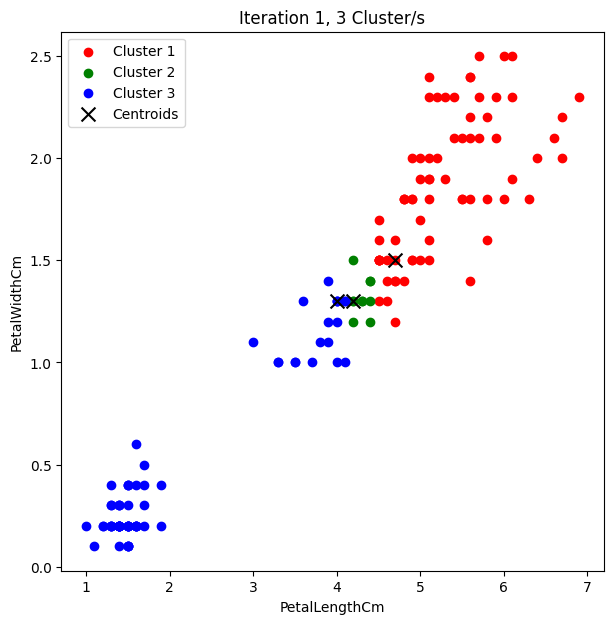

Iteration 1, 3 Cluster/s. WCSS: 453.01000000000005


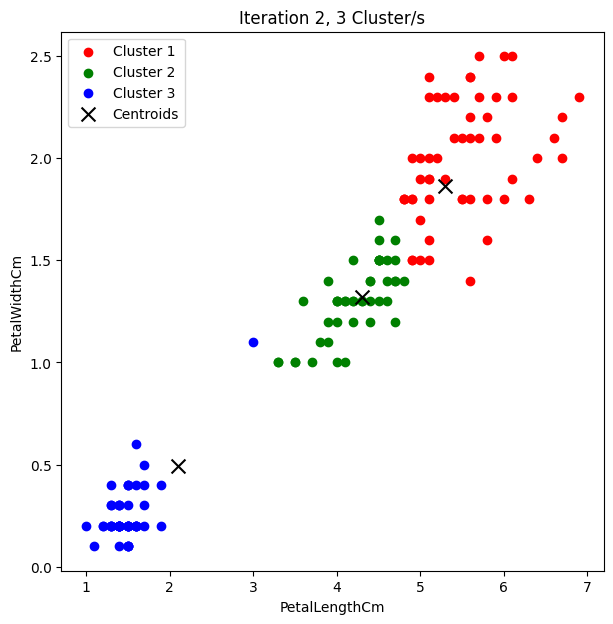

Iteration 2, 3 Cluster/s. WCSS: 58.825173596921196


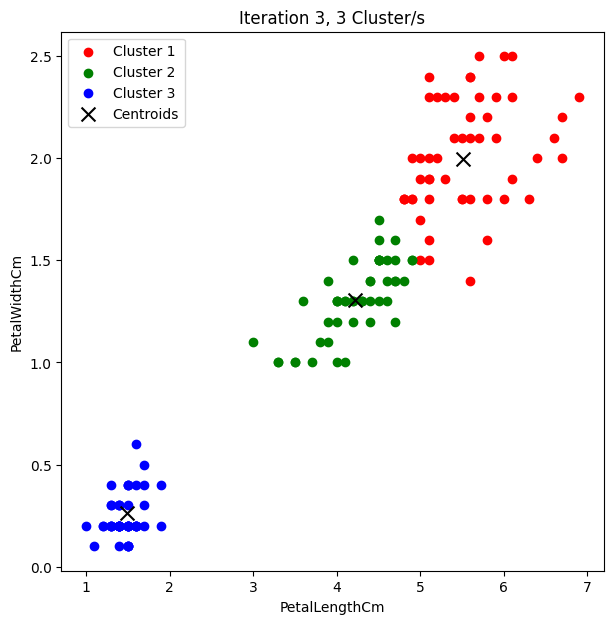

Iteration 3, 3 Cluster/s. WCSS: 31.814457125227207


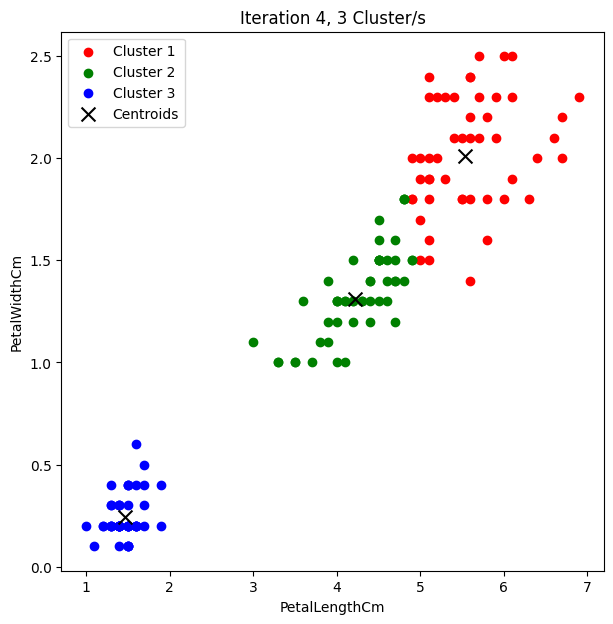

Iteration 4, 3 Cluster/s. WCSS: 31.65871596708581


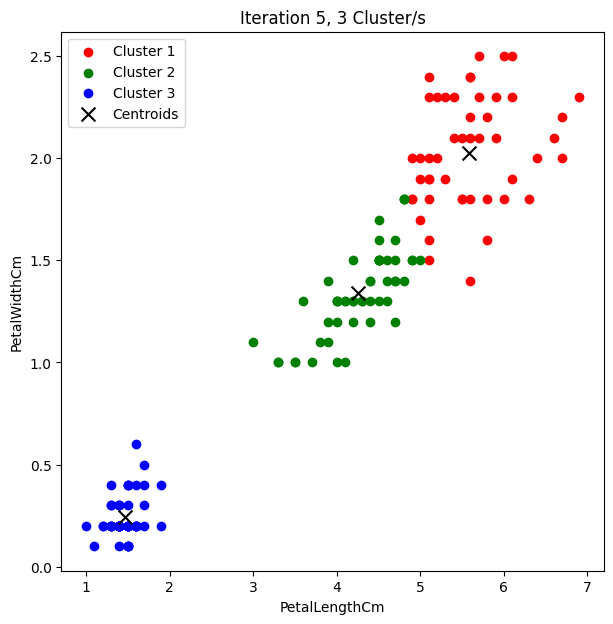

Iteration 5, 3 Cluster/s. WCSS: 31.411805595931877


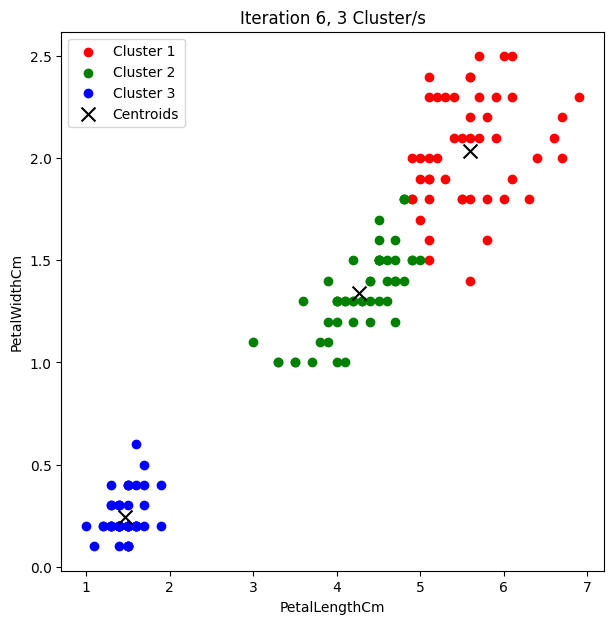

Iteration 6, 3 Cluster/s. WCSS: 31.387758974358977
Iteration 1, 1 Cluster/s. WCSS: 1534.7399999999996
Iteration 2, 1 Cluster/s. WCSS: 550.6434666666671
Iteration 1, 2 Cluster/s. WCSS: 479.6999999999998
Iteration 2, 2 Cluster/s. WCSS: 107.94353870856868
Iteration 3, 2 Cluster/s. WCSS: 87.80205017284402
Iteration 4, 2 Cluster/s. WCSS: 86.8112079626844
Iteration 5, 2 Cluster/s. WCSS: 86.40394533570998
Iteration 1, 3 Cluster/s. WCSS: 38.430000000000014
Iteration 2, 3 Cluster/s. WCSS: 32.52522093547345
Iteration 3, 3 Cluster/s. WCSS: 31.799010075173555
Iteration 4, 3 Cluster/s. WCSS: 31.658715967085804
Iteration 5, 3 Cluster/s. WCSS: 31.411805595931867
Iteration 6, 3 Cluster/s. WCSS: 31.387758974358974
Iteration 1, 4 Cluster/s. WCSS: 68.08
Iteration 2, 4 Cluster/s. WCSS: 31.909233914906643
Iteration 3, 4 Cluster/s. WCSS: 31.6587159670858
Iteration 4, 4 Cluster/s. WCSS: 31.411805595931842
Iteration 5, 4 Cluster/s. WCSS: 31.387758974358967
Iteration 1, 5 Cluster/s. WCSS: 34.90000000000003
Ite

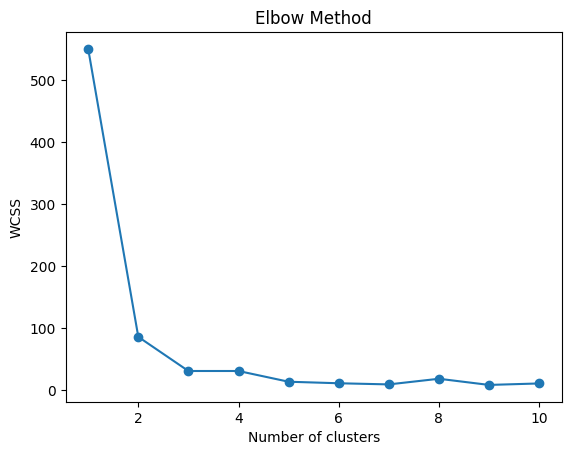


Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
Accuracy: 0.9600
Precision: 0.9605
Recall: 0.9600
F1 Score: 0.9600


(array([[50,  0,  0],
        [ 0, 48,  2],
        [ 0,  4, 46]]),
 0.96,
 0.9604700854700855,
 0.96,
 0.9599839935974391)

In [ ]:
print("GROUP 1: K-MEANS CLUSTERING")

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
from scipy.stats import mode

# Load dataset
df = pd.read_csv('iris.csv')

# Drop NaN values (if any)
df = df.dropna()

# Select features for clustering
feature1 = "PetalLengthCm"
feature2 = "PetalWidthCm"
adjusted_df = df[[feature1, feature2]]

# Convert species names to numeric labels
species_mapping = {species: i for i, species in enumerate(df['Species'].unique())}
true_labels = df['Species'].map(species_mapping).values  # Store true labels as numbers

# Euclidean distance function
def calculate_euclidean_distance(p1, p2):
    return sum((p1[i] - p2[i]) ** 2 for i in range(len(p1))) ** 0.5

# Assign clusters to centroids
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    labels = []
    for point in data:
        distances = [calculate_euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
        labels.append(cluster_index)  # Store predicted label
    return clusters, labels

# Compute new centroids
def compute_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:  # Avoid division by zero
            new_centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
            new_centroids.append(new_centroid)
    return new_centroids

# Compute WCSS
def compute_wcss(clusters, centroids):
    wcss = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            wcss += calculate_euclidean_distance(point, centroids[i]) ** 2
    return wcss

# Visualization of clusters
def plot_clusters(data, centroids, clusters, iteration, k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    plt.figure(figsize=(7, 7))
    for i, cluster in enumerate(clusters):
        cluster_points = list(zip(*cluster))
        if cluster_points:
            plt.scatter(cluster_points[0], cluster_points[1], c=colors[i % len(colors)], label=f'Cluster {i+1}')
    centroid_points = list(zip(*centroids))
    plt.scatter(centroid_points[0], centroid_points[1], c='k', marker='x', s=100, label='Centroids')
    plt.title(f'Iteration {iteration}, {k} Cluster/s')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

# K-Means Algorithm with visualization
def k_means(data, k, max_iters=100):
    centroids = random.sample(data, k)  # Randomly initialize centroids
    for i in range(max_iters):
        clusters, labels = assign_clusters(data, centroids) # determines clusters
        plot_clusters(data, centroids, clusters, i+1, k)  # Plot each iteration

        wcss = compute_wcss(clusters, centroids)
        print(f"Iteration {i+1}, {k} Cluster/s. WCSS: {wcss}")

        new_centroids = compute_centroids(clusters) # assigns new centroids
        if new_centroids == centroids:
            return centroids, clusters, labels
        centroids = new_centroids
    return centroids, clusters, labels

# Run k-means for k=3 (since the dataset has 3 species)
k = 3
centroids, clusters, predicted_labels = k_means(adjusted_df.values.tolist(), k)

# Elbow Method to determine optimal k
wcss_values = []
for i in range(1, 11):
    centroids, clusters, _ = k_means(adjusted_df.values.tolist(), i)
    wcss_values.append(compute_wcss(clusters, centroids))

# Plot Elbow Method (AFTER clustering visualizations)
plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Convert predicted cluster labels to match true labels
def evaluate_clustering(true_labels, predicted_labels):
    label_mapping = {}
    for cluster_id in np.unique(predicted_labels):
        mask = (np.array(predicted_labels) == cluster_id)
        if np.any(mask):  # Ensure mask is not empty
            most_common_label = mode(true_labels[mask], keepdims=True).mode[0]
            label_mapping[cluster_id] = most_common_label
    mapped_predictions = np.vectorize(label_mapping.get)(predicted_labels)
    cm = confusion_matrix(true_labels, mapped_predictions)
    print("\nConfusion Matrix:")
    print(cm)
    return cm

# Print confusion matrix (AFTER visualizations)
evaluate_clustering(true_labels, np.array(predicted_labels))
